In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install gdown

# Import atau Ekstrak Dataset

In [3]:
import gdown
import zipfile

# URL file dari Google Drive
url = 'https://drive.google.com/uc?id=1SSX3DcOx91zzRWDwCp9z91s5pJT_aVPC'

# Nama file setelah diunduh
output = '/content/home-credit-default-risk.zip'

# Unduh file dari Google Drive
gdown.download(url, output, quiet=False)

# Ekstrak file zip
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('/content/home-credit-default-risk')

Downloading...
From (original): https://drive.google.com/uc?id=1SSX3DcOx91zzRWDwCp9z91s5pJT_aVPC
From (redirected): https://drive.google.com/uc?id=1SSX3DcOx91zzRWDwCp9z91s5pJT_aVPC&confirm=t&uuid=15ea8a46-a9f2-4801-805b-7c515b4312e5
To: /content/home-credit-default-risk.zip
100%|██████████| 722M/722M [00:10<00:00, 70.3MB/s]


Mengatur tampilan pandas

In [4]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Deskripsi Data

1. Data Utama (application_{train|test}.csv):
   - Data utama, terbagi menjadi dua file untuk Data Latih (dengan TARGET) dan Data Uji (tanpa TARGET).

2. Biro Kredit (bureau.csv):
   - Data kredit sebelumnya dari klien yang dilaporkan ke Biro Kredit (untuk klien yang memiliki pinjaman dalam sampel data kami).

3. Saldo Bulanan Biro Kredit (bureau_balance.csv):
   - Saldo bulanan dari kredit sebelumnya di Biro Kredit.

4. Saldo Bulanan Kredit POS dan Tunai (POS_CASH_balance.csv):
   - Snapshot saldo bulanan dari kredit POS (point of sales) dan tunai sebelumnya yang dimiliki pelamar dengan Home Credit.

5. Saldo Bulanan Kartu Kredit (credit_card_balance.csv):
   - Snapshot saldo bulanan dari kartu kredit sebelumnya yang dimiliki pelamar dengan Home Credit.

6. Aplikasi Sebelumnya (previous_application.csv):
   - Semua aplikasi sebelumnya untuk pinjaman Home Credit dari klien yang memiliki pinjaman dalam sampel data kami.

7. Riwayat Pembayaran (installments_payments.csv):
   - Riwayat pembayaran untuk kredit yang telah dibayarkan sebelumnya di Home Credit yang terkait dengan pinjaman dalam sampel kami.

8. Deskripsi Kolom Home Credit (HomeCredit_columns_description.csv):
   - File yang berisi deskripsi untuk kolom-kolom dalam berbagai file data.


In [5]:
path_bureau = '/content/home-credit-default-risk/bureau.csv'
path_bureau_balance = '/content/home-credit-default-risk/bureau_balance.csv'
path_POS_CASH_balance = '/content/home-credit-default-risk/POS_CASH_balance.csv'
path_credit_card_balance = '/content/home-credit-default-risk/credit_card_balance.csv'
path_previous_application = '/content/home-credit-default-risk/previous_application.csv'
path_installments_payments = '/content/home-credit-default-risk/installments_payments.csv'

In [6]:
df_bureau = pd.read_csv(path_bureau)
df_bureau_balance = pd.read_csv(path_bureau_balance)
df_POS_CASH_balance = pd.read_csv(path_POS_CASH_balance)
df_credit_card_balance = pd.read_csv(path_credit_card_balance)
df_previous_application = pd.read_csv(path_previous_application)
df_installments_payments = pd.read_csv(path_installments_payments)

print('Ukuran data POS_CASH_balance:', df_POS_CASH_balance.shape)
print('Ukuran data bureau_balance:', df_bureau_balance.shape)
print('Ukuran data previous_application:', df_previous_application.shape)
print('Ukuran data installments_payments:', df_installments_payments.shape)
print('Ukuran data credit_card_balance:', df_credit_card_balance.shape)
print('Ukuran data bureau:', df_bureau.shape)

Ukuran data POS_CASH_balance: (10001358, 8)
Ukuran data bureau_balance: (27299925, 3)
Ukuran data previous_application: (1670214, 37)
Ukuran data installments_payments: (13605401, 8)
Ukuran data credit_card_balance: (3840312, 23)
Ukuran data bureau: (1716428, 17)


# CLEANING, PREPROCESSING, FEATURE ENGINEERING
Pada tahap ini, dilakukan penghapusan atau modifikasi beberapa fitur agar dapat disusun dalam format yang cocok untuk proses pemodelan

# df_application_train

In [42]:
df_application_train = pd.read_csv('/content/home-credit-default-risk/application_train.csv')
df_application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [43]:
print('Ukuran data application_train:', df_application_train.shape)

Ukuran data application_train: (307511, 122)


In [44]:
df_application_train.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

Menghapus kolom "SK_ID_CURR" karena kolom tersebut hanyalah sebuah identifikasi unik untuk setiap entri dalam dataset

In [45]:
df_application_train.drop(columns=['SK_ID_CURR'], inplace=True)

<Axes: >

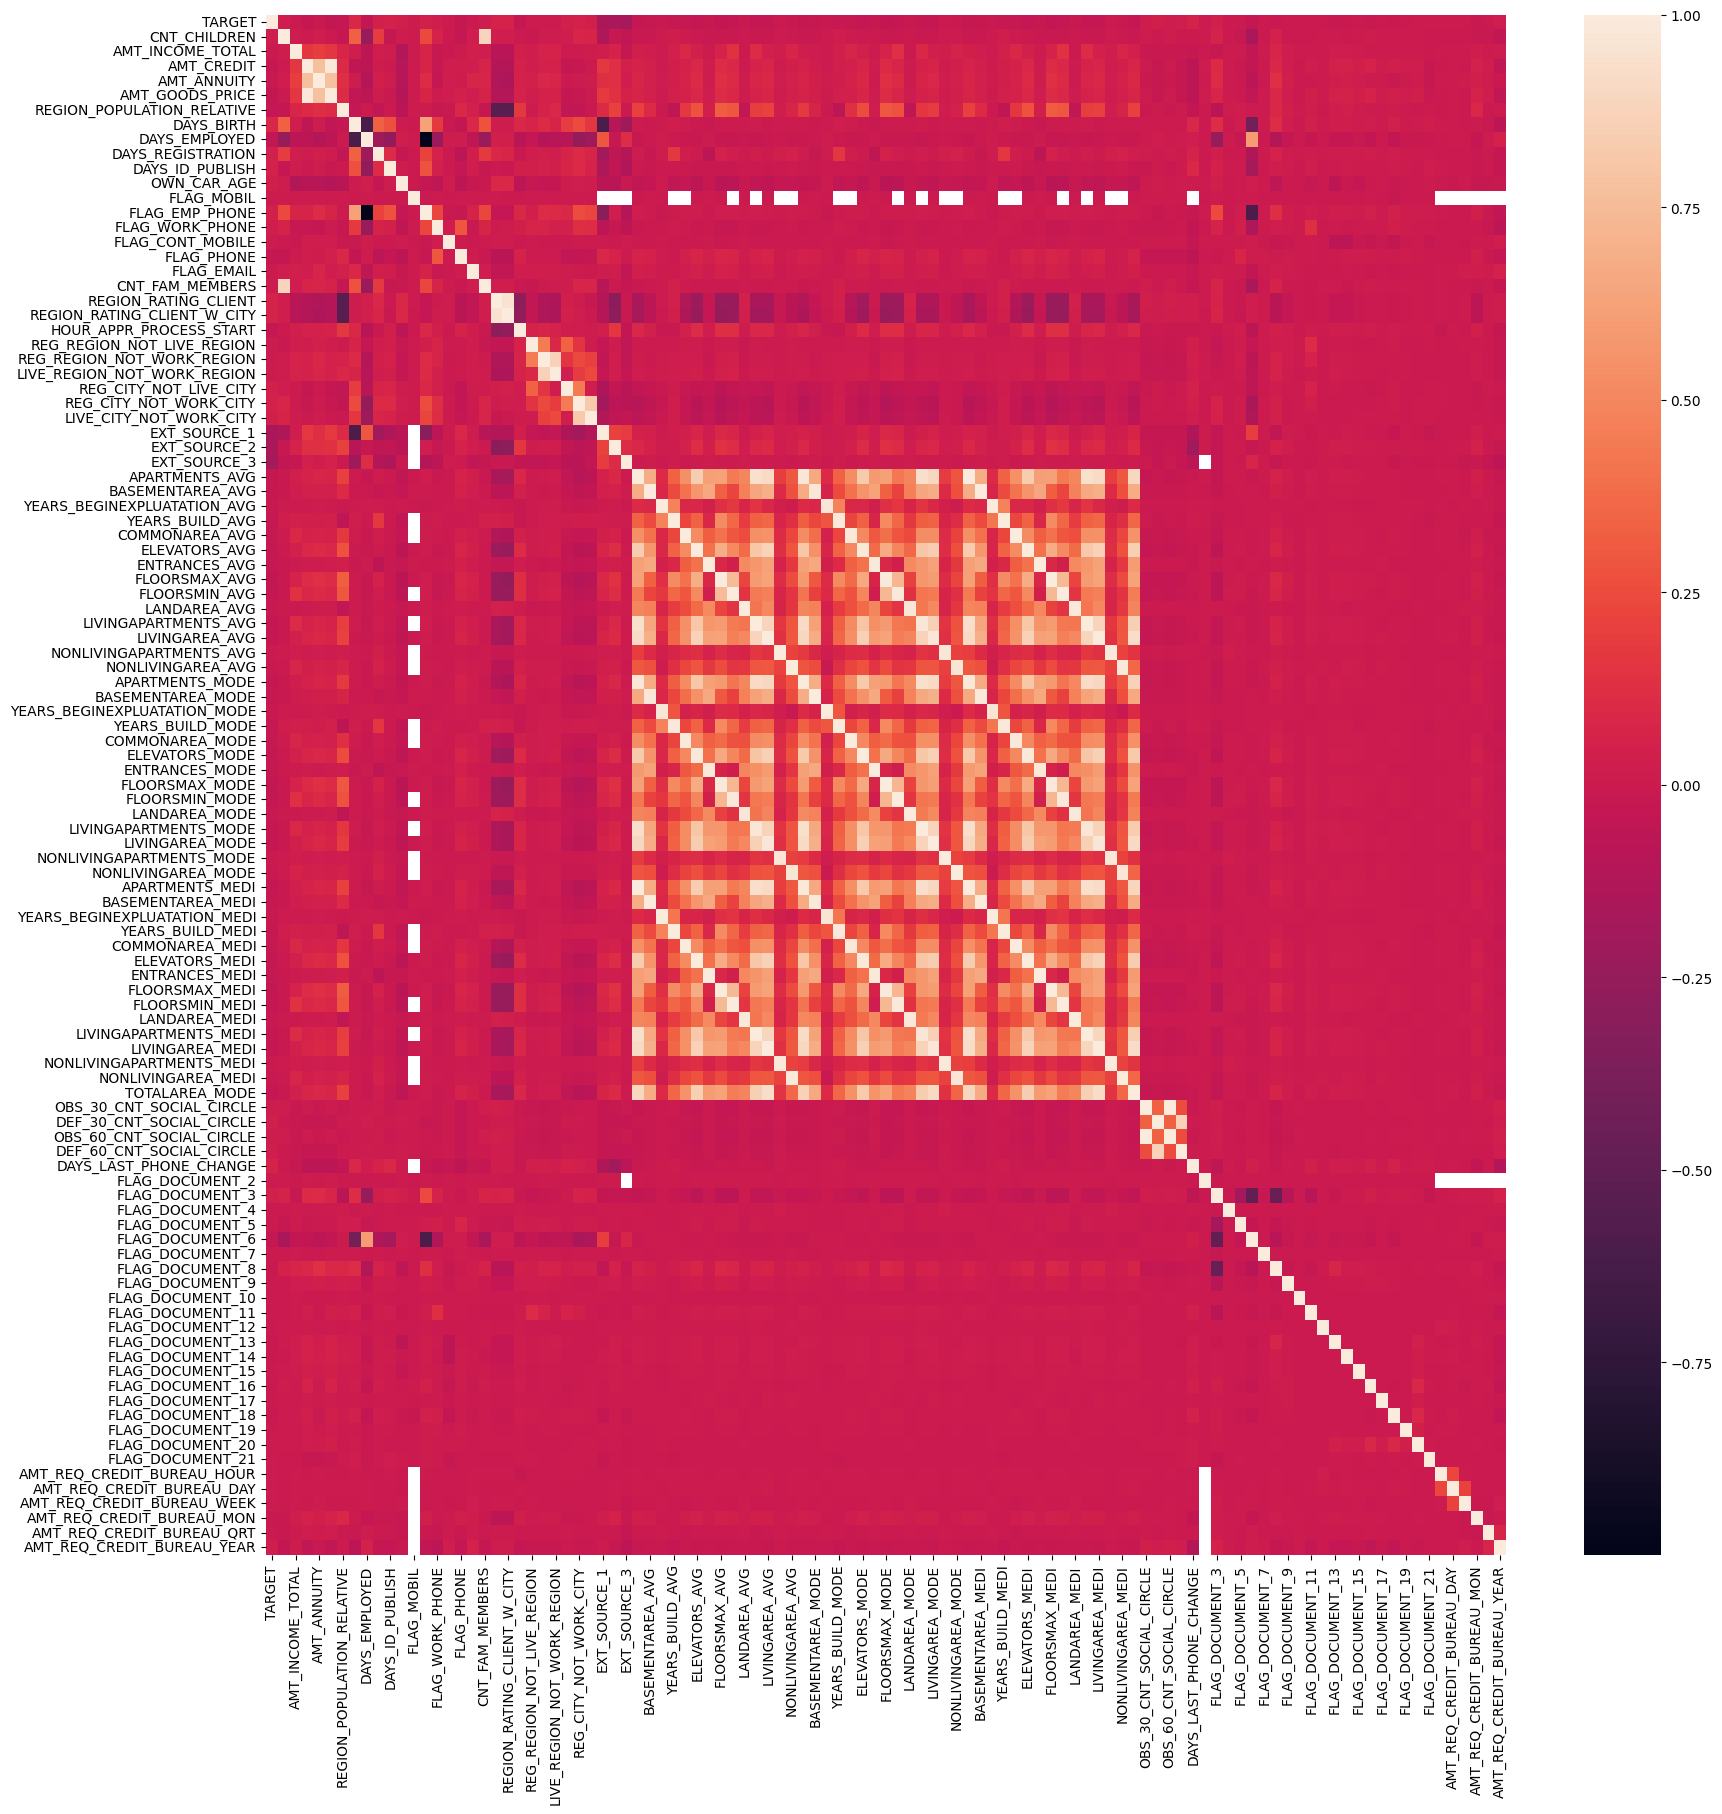

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df_application_train.corr(numeric_only=True))

Di sini, jika terdapat pasangan fitur dengan korelasi yang tinggi, salah satunya akan dipilih. Tidak ada standar pasti untuk menentukan nilai korelasi yang dianggap tinggi, tetapi biasanya angka 0.7 digunakan sebagai acuan.

In [47]:
import numpy as np

corr_matrix = df_application_train.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [48]:
to_drop_hicorr

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [49]:
df_application_train.drop(to_drop_hicorr, axis=1, inplace=True)
print("Ukuran DataFrame setelah penghapusan kolom:", df_application_train.shape)

Ukuran DataFrame setelah penghapusan kolom: (307511, 79)


# Check Categorical Features

In [50]:
df_application_train.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [51]:
df_application_train['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Menggabungkan kategori yang serupa menjadi satu kategori yang lebih umum, sehingga memperjelas dan menyederhanakan analisis.

In [52]:
category_mapping = {
    'Business Entity Type 1': 'Business Entity',  # Menggabungkan tipe bisnis 1
    'Business Entity Type 2': 'Business Entity',  # Menggabungkan tipe bisnis 2
    'Business Entity Type 3': 'Business Entity',  # Menggabungkan tipe bisnis 3
    'Self-employed': 'Self-employed',  # Pekerja mandiri
    'Government': 'Government',  # Pemerintah
    'School': 'Education',  # Sekolah
    'Kindergarten': 'Education',  # Taman kanak-kanak
    'University': 'Education',  # Universitas
    'Medicine': 'Healthcare',  # Kesehatan - Bidang Kedokteran
    'Construction': 'Construction',  # Konstruksi
    'Trade: type 1': 'Trade',  # Tipe perdagangan 1
    'Trade: type 2': 'Trade',  # Tipe perdagangan 2
    'Trade: type 3': 'Trade',  # Tipe perdagangan 3
    'Trade: type 4': 'Trade',  # Tipe perdagangan 4
    'Trade: type 5': 'Trade',  # Tipe perdagangan 5
    'Trade: type 6': 'Trade',  # Tipe perdagangan 6
    'Trade: type 7': 'Trade',  # Tipe perdagangan 7
    'Industry: type 1': 'Industry',  # Tipe industri 1
    'Industry: type 2': 'Industry',  # Tipe industri 2
    'Industry: type 3': 'Industry',  # Tipe industri 3
    'Industry: type 4': 'Industry',  # Tipe industri 4
    'Industry: type 5': 'Industry',  # Tipe industri 5
    'Industry: type 6': 'Industry',  # Tipe industri 6
    'Industry: type 7': 'Industry',  # Tipe industri 7
    'Industry: type 8': 'Industry',  # Tipe industri 8
    'Industry: type 9': 'Industry',  # Tipe industri 9
    'Industry: type 10': 'Industry',  # Tipe industri 10
    'Industry: type 11': 'Industry',  # Tipe industri 11
    'Industry: type 12': 'Industry',  # Tipe industri 12
    'Industry: type 13': 'Industry',  # Tipe industri 13
    'Security': 'Security',  # Keamanan
    'Housing': 'Housing',  # Perumahan
    'Military': 'Military',  # Militer
    'Bank': 'Finance',  # Bank
    'Agriculture': 'Agriculture',  # Pertanian
    'Police': 'Government',  # Kepolisian
    'Transport: type 1': 'Transport',  # Tipe transportasi 1
    'Transport: type 2': 'Transport',  # Tipe transportasi 2
    'Transport: type 3': 'Transport',  # Tipe transportasi 3
    'Transport: type 4': 'Transport',  # Tipe transportasi 4
    'Postal': 'Government',  # Pos
    'Security Ministries': 'Government',  # Kementerian Keamanan
    'Restaurant': 'Hospitality',  # Restoran
    'Services': 'Other Services',  # Layanan Lainnya
    'Hotel': 'Hospitality',  # Hotel
    'Electricity': 'Utilities',  # Listrik
    'Insurance': 'Finance',  # Asuransi
    'Telecom': 'Utilities',  # Telekomunikasi
    'Emergency': 'Government',  # Darurat
    'Advertising': 'Marketing',  # Periklanan
    'Realtor': 'Real Estate',  # Agen Properti
    'Culture': 'Arts and Culture',  # Kebudayaan
    'Legal Services': 'Legal',  # Layanan Hukum
    'Cleaning': 'Services',  # Layanan Pembersihan
    'Mobile': 'Telecom',  # Telepon Seluler
    'Religion': 'Religious',  # Agama
}

# Mengganti nilai kategori menggunakan mapping
df_application_train['ORGANIZATION_TYPE'] = df_application_train['ORGANIZATION_TYPE'].replace(category_mapping)

# Menyesuaikan kategori 'XNA' menjadi 'Other'
df_application_train['ORGANIZATION_TYPE'] = df_application_train['ORGANIZATION_TYPE'].replace('XNA', 'Other')
print(df_application_train['ORGANIZATION_TYPE'].value_counts())

Business Entity     84529
Other               72057
Self-employed       38412
Government          17436
Education           17100
Trade               14315
Industry            14311
Healthcare          11193
Transport            8990
Construction         6721
Security             3247
Finance              3104
Housing              2958
Hospitality          2777
Military             2634
Agriculture          2454
Other Services       1575
Utilities            1527
Marketing             429
Real Estate           396
Arts and Culture      379
Telecom               317
Legal                 305
Services              260
Religious              85
Name: ORGANIZATION_TYPE, dtype: int64


In [53]:
df_application_train['ORGANIZATION_TYPE'].nunique()

25

In [54]:
for col in df_application_train.select_dtypes(include='object').columns.tolist():
    print(df_application_train[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64


N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64


Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64


Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [55]:
df_application_train.drop(['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE'], axis=1, inplace=True)
print("Ukuran DataFrame setelah penghapusan kolom:", df_application_train.shape)

Ukuran DataFrame setelah penghapusan kolom: (307511, 74)


# MISSING VALUES
Missing Value Checking

In [56]:
total = df_application_train.isnull().sum().sort_values(ascending=False)
percent = (df_application_train.isnull().sum() / len(df_application_train) * 100).sort_values(ascending=False)
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Persentase'])
missing_application_train_data

,Total,Persentase
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
YEARS_BUILD_AVG,204488,66.497784
OWN_CAR_AGE,202929,65.990810
LANDAREA_AVG,182590,59.376738
BASEMENTAREA_AVG,179943,58.515956
EXT_SOURCE_1,173378,56.381073
NONLIVINGAREA_AVG,169682,55.179164
WALLSMATERIAL_MODE,156341,50.840783


Menghapus kolom yang memiliki persentase nilai yang hilang yang cukup tinggi, yang mungkin sulit untuk diimputasi dengan tepat atau dapat mengganggu kinerja model.

In [57]:
import pandas as pd

column_drop_miss = ['COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'YEARS_BUILD_AVG',
                     'OWN_CAR_AGE', 'LANDAREA_AVG', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG',
                     'WALLSMATERIAL_MODE', 'APARTMENTS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
                     'YEARS_BEGINEXPLUATATION_AVG']

df_application_train.drop(columns=column_drop_miss, axis=1, inplace=True)
print("Ukuran DataFrame setelah penghapusan kolom:", df_application_train.shape)

Ukuran DataFrame setelah penghapusan kolom: (307511, 60)


In [58]:
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   CODE_GENDER                 307511 non-null  object 
 2   FLAG_OWN_CAR                307511 non-null  object 
 3   FLAG_OWN_REALTY             307511 non-null  object 
 4   CNT_CHILDREN                307511 non-null  int64  
 5   AMT_INCOME_TOTAL            307511 non-null  float64
 6   AMT_CREDIT                  307511 non-null  float64
 7   NAME_INCOME_TYPE            307511 non-null  object 
 8   NAME_EDUCATION_TYPE         307511 non-null  object 
 9   NAME_FAMILY_STATUS          307511 non-null  object 
 10  REGION_POPULATION_RELATIVE  307511 non-null  float64
 11  DAYS_BIRTH                  307511 non-null  int64  
 12  DAYS_EMPLOYED               307511 non-null  int64  
 13  DAYS_REGISTRAT

Membuat kolom baru yang akan menyimpan rasio antara jumlah kredit yang dimiliki oleh pelamar dengan total pendapatan mereka. Kolom ini membantu kita dalam menganalisis seberapa besar bagian dari pendapatan seseorang yang digunakan untuk membayar kredit.

In [59]:
df_application_train['CREDIT_INCOME_PERCENT'] = df_application_train['AMT_CREDIT'] / df_application_train['AMT_INCOME_TOTAL']
df_application_train['CREDIT_INCOME_PERCENT'].head()

0    2.007889
1    4.790750
2    2.000000
3    2.316167
4    4.222222
Name: CREDIT_INCOME_PERCENT, dtype: float64

Hapus kolom yang sudah tidak digunakan

In [60]:
df_application_train.drop(['AMT_CREDIT', 'AMT_INCOME_TOTAL'], axis=1, inplace=True)

Kolom ini akan berisi total jumlah permintaan kredit yang dilakukan oleh pelamar dalam berbagai rentang waktu, seperti per jam, per hari, per minggu, per bulan, per kuartal, dan per tahun. Dengan kata lain, kita menjumlahkan semua nilai permintaan kredit dari kolom yang ada untuk mendapatkan total permintaan kredit pelamar.

In [61]:
df_application_train['TOTAL_REQ_CREDIT'] = df_application_train[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                                                                 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                                                                 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].sum(axis=1)
df_application_train['TOTAL_REQ_CREDIT'].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TOTAL_REQ_CREDIT, dtype: float64

Hapus kolom yang sudah tidak digunakan

In [62]:
df_application_train.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                           'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                           'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1, inplace=True)

Konversi DAYS_BIRTH menjadi usia dalam tahun

In [63]:
df_application_train['AGE'] = round(-df_application_train['DAYS_BIRTH'] / 365, 1)

Konversi DAYS_EMPLOYED menjadi tahun bekerja

In [64]:
df_application_train['YEARS_EMPLOYED'] = round(-df_application_train['DAYS_EMPLOYED'] / 365, 1)

Hapus kolom yang sudah tidak digunakan

In [65]:
df_application_train.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

In [66]:
df_application_train.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CREDIT_INCOME_PERCENT,TOTAL_REQ_CREDIT,AGE,YEARS_EMPLOYED
0,1,M,N,Y,0,Working,Secondary / secondary special,Single / not married,0.018801,-3648.0,-2120,1,0,1,1,0,Laborers,2,WEDNESDAY,10,0,0,0,0,Business Entity,0.262949,0.139376,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.007889,1.0,25.9,1.7
1,0,F,N,N,0,State servant,Higher education,Married,0.003541,-1186.0,-291,1,0,1,1,0,Core staff,1,MONDAY,11,0,0,0,0,Education,0.622246,NaN,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.790750,0.0,45.9,3.3
2,0,M,Y,Y,0,Working,Secondary / secondary special,Single / not married,0.010032,-4260.0,-2531,1,1,1,1,0,Laborers,2,MONDAY,9,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0.0,52.2,0.6
3,0,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,0.008019,-9833.0,-2437,1,0,1,0,0,Laborers,2,WEDNESDAY,17,0,0,0,0,Business Entity,0.650442,NaN,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.316167,0.0,52.1,8.3
4,0,M,N,Y,0,Working,Secondary / secondary special,Single / not married,0.028663,-4311.0,-3458,1,0,1,0,0,Core staff,2,THURSDAY,11,0,0,0,1,Religious,0.322738,NaN,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4.222222,0.0,54.6,8.3


# Exploratory Data Analysis

In [67]:
df_application_train.describe()

,TARGET,CNT_CHILDREN,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CREDIT_INCOME_PERCENT,TOTAL_REQ_CREDIT,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,0.020868,-4986.120328,-2994.202373,0.999997,0.199368,0.998133,0.281066,0.056720,2.052463,12.063419,0.015144,0.050769,0.078173,0.230454,5.143927e-01,0.510853,1.422245,0.143421,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,3.957570,2.145686,43.936992,-174.841963
std,0.272419,0.722121,0.013831,3522.886321,1509.450419,0.001803,0.399526,0.043164,0.449521,0.231307,0.509034,3.265832,0.122126,0.219526,0.268444,0.421124,1.910602e-01,0.194844,2.400989,0.446698,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,2.689728,2.290869,11.956084,387.070028
min,0.000000,0.000000,0.000290,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004808,0.000000,20.500000,-1000.700000
25%,0.000000,0.000000,0.010006,-7479.500000,-4299.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.018667,0.000000,34.000000,0.800000
50%,0.000000,0.000000,0.018850,-4504.000000,-3254.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,-757.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.265067,2.000000,43.200000,3.300000
75%,0.000000,1.000000,0.028663,-2010.000000,-1720.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,6.636171e-01,0.669057,2.000000,0.000000,-274.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.159880,3.000000,53.900000,7.600000
max,1.000000,19.000000,0.0

CNT_CHILDREN: Nilai maksimum (19) terlihat agak aneh. Ini bisa menjadi indikasi outlier atau data yang tidak biasa.

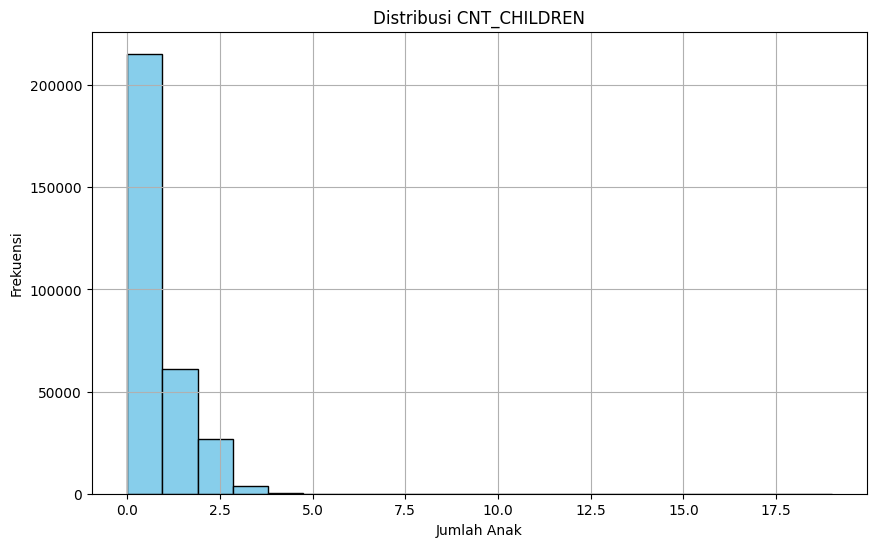

In [68]:
import matplotlib.pyplot as plt

# Plot histogram sebelum penanganan outlier
plt.figure(figsize=(10, 6))
plt.hist(df_application_train['CNT_CHILDREN'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi CNT_CHILDREN')
plt.xlabel('Jumlah Anak')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

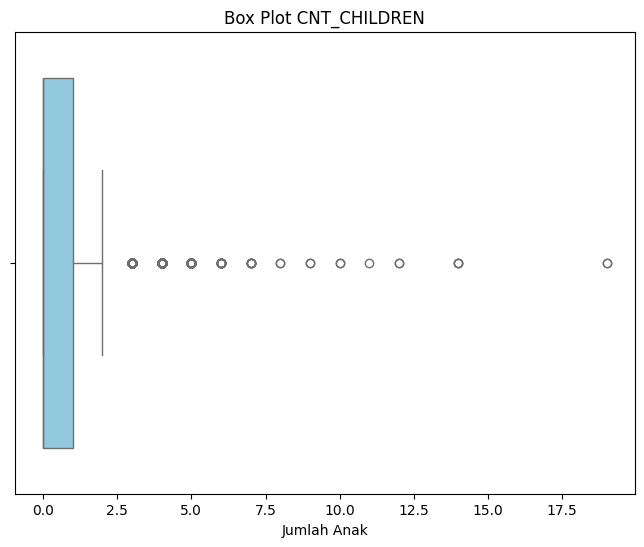

In [69]:
import seaborn as sns

# Plot box plot untuk kolom CNT_CHILDREN
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_application_train, x='CNT_CHILDREN', color='skyblue')
plt.title('Box Plot CNT_CHILDREN')
plt.xlabel('Jumlah Anak')
plt.show()

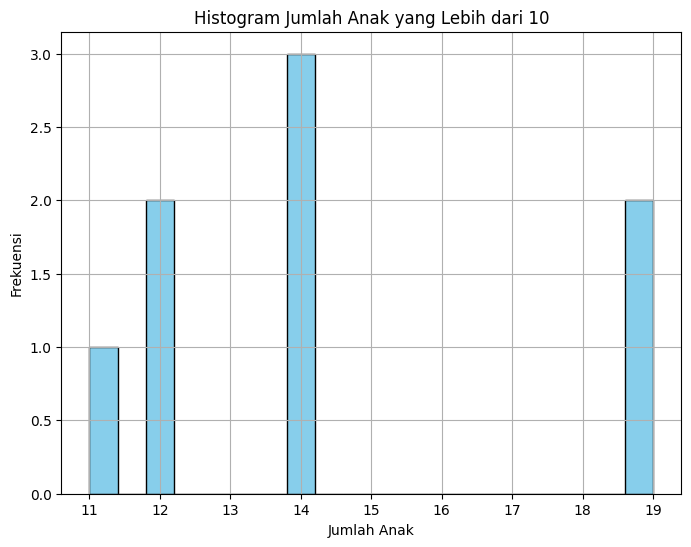

In [70]:
import matplotlib.pyplot as plt

# Filter data untuk jumlah anak lebih dari 10
outlier_data = df_application_train[df_application_train['CNT_CHILDREN'] > 10]

# Plot histogram jumlah anak yang lebih dari 10
plt.figure(figsize=(8, 6))
plt.hist(outlier_data['CNT_CHILDREN'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Jumlah Anak yang Lebih dari 10')
plt.xlabel('Jumlah Anak')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

Hapus baris dengan indeks outlier

In [71]:
print("Jumlah baris sebelum penghapusan outlier:", len(df_application_train))

Jumlah baris sebelum penghapusan outlier: 307511


In [72]:
df_application_train.drop(df_application_train[df_application_train['CNT_CHILDREN'] > 10].index, inplace=True)

print("Jumlah baris setelah penghapusan outlier:", len(df_application_train))

Jumlah baris setelah penghapusan outlier: 307503


Analisis Variabel Kategorikal periksa frekuensi masing-masing kategori dan hubungannya dengan variabel target.

<ipython-input-73-aeceb8c51890>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, hue=None, palette='viridis')


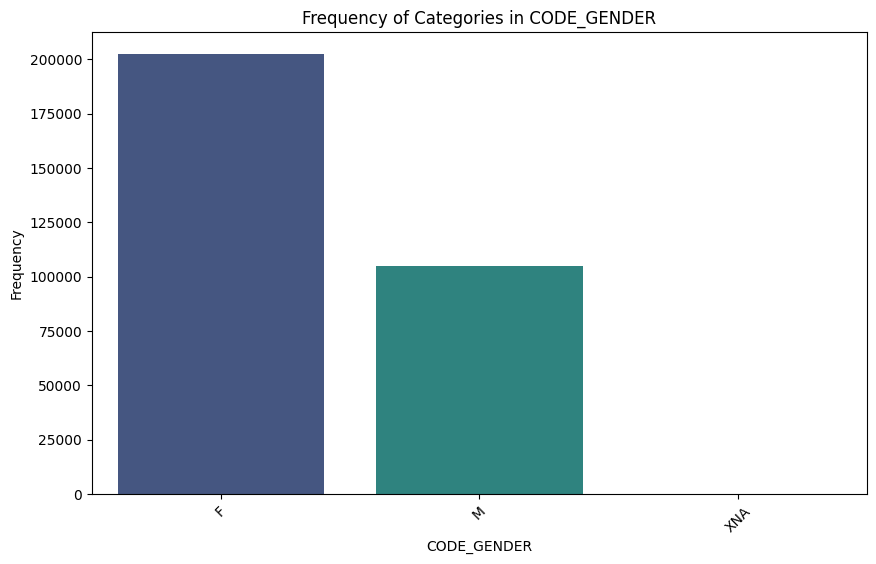

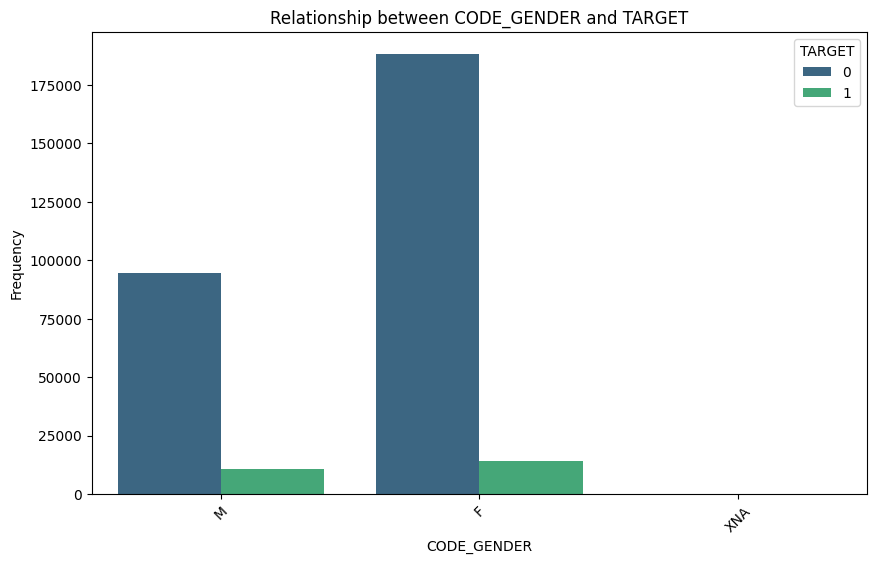

<ipython-input-73-aeceb8c51890>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, hue=None, palette='viridis')


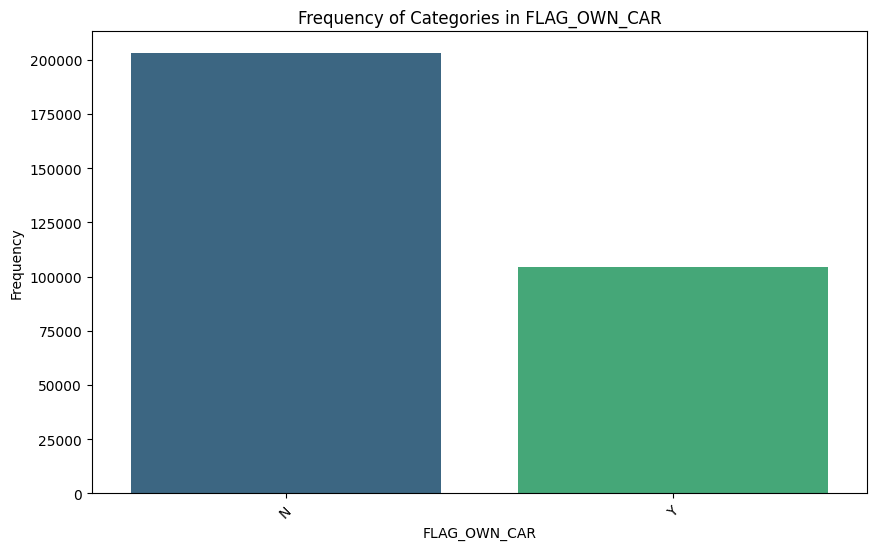

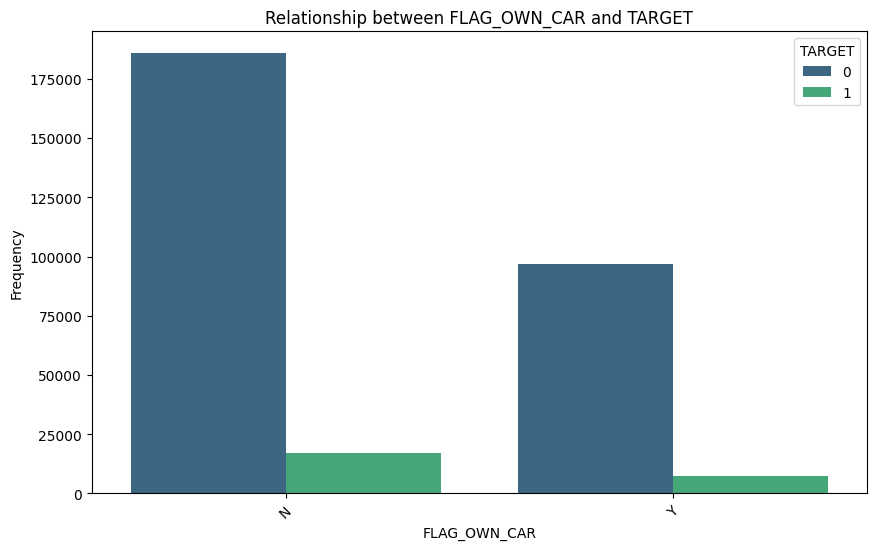

<ipython-input-73-aeceb8c51890>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, hue=None, palette='viridis')


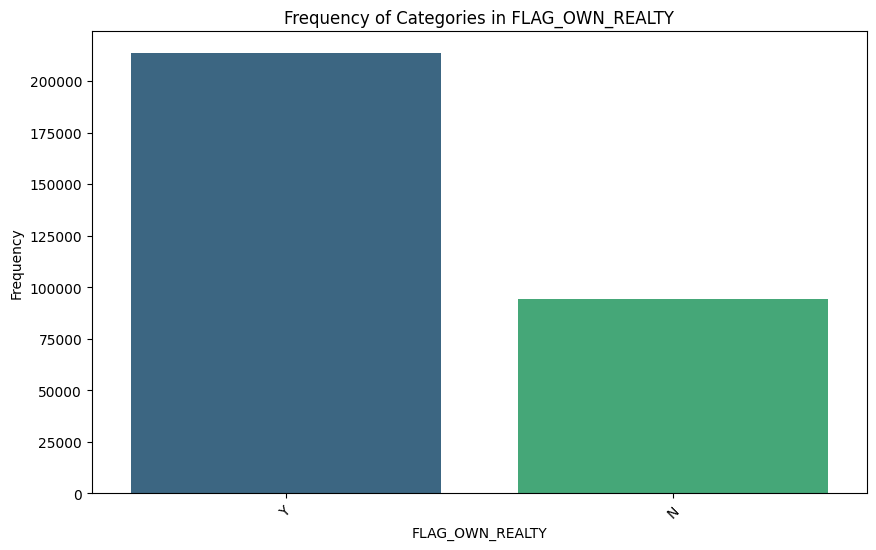

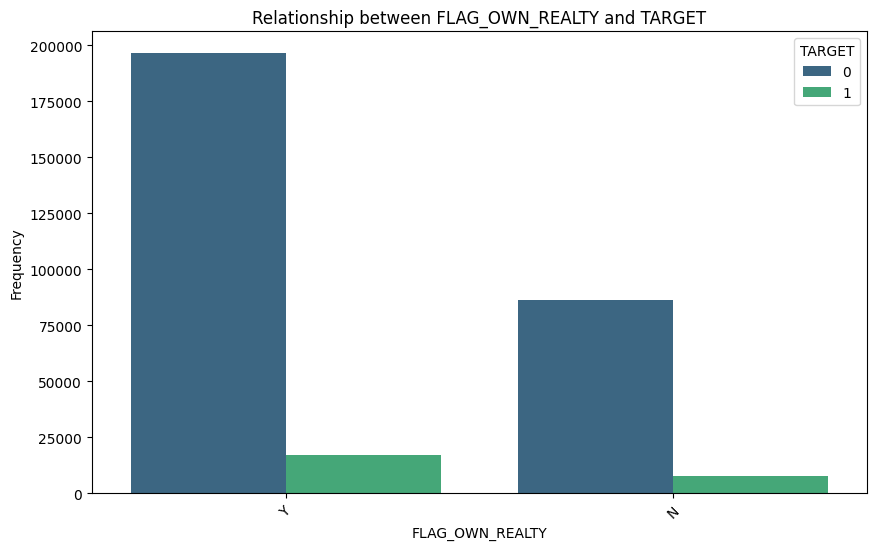

<ipython-input-73-aeceb8c51890>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, hue=None, palette='viridis')


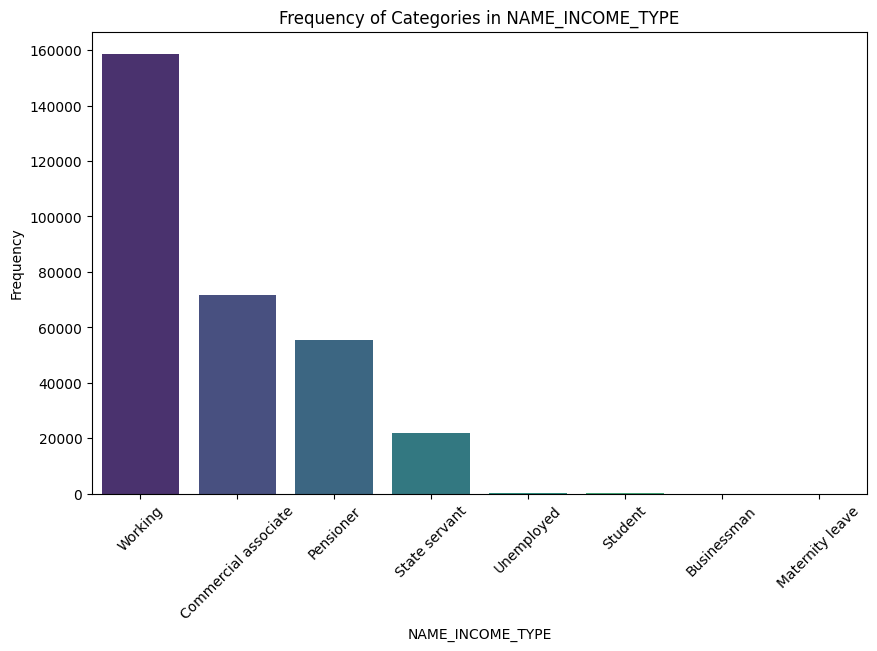

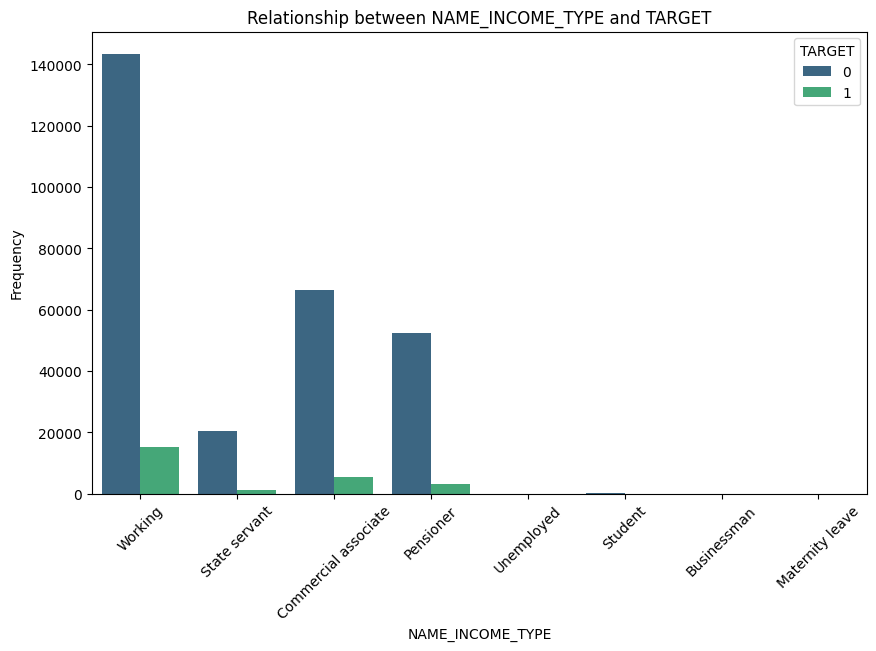

<ipython-input-73-aeceb8c51890>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, hue=None, palette='viridis')


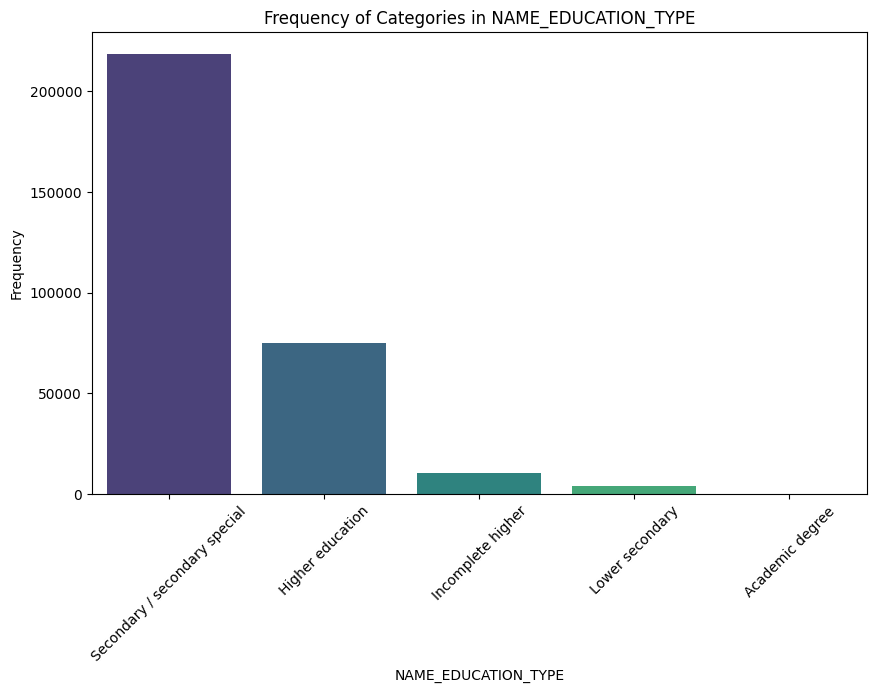

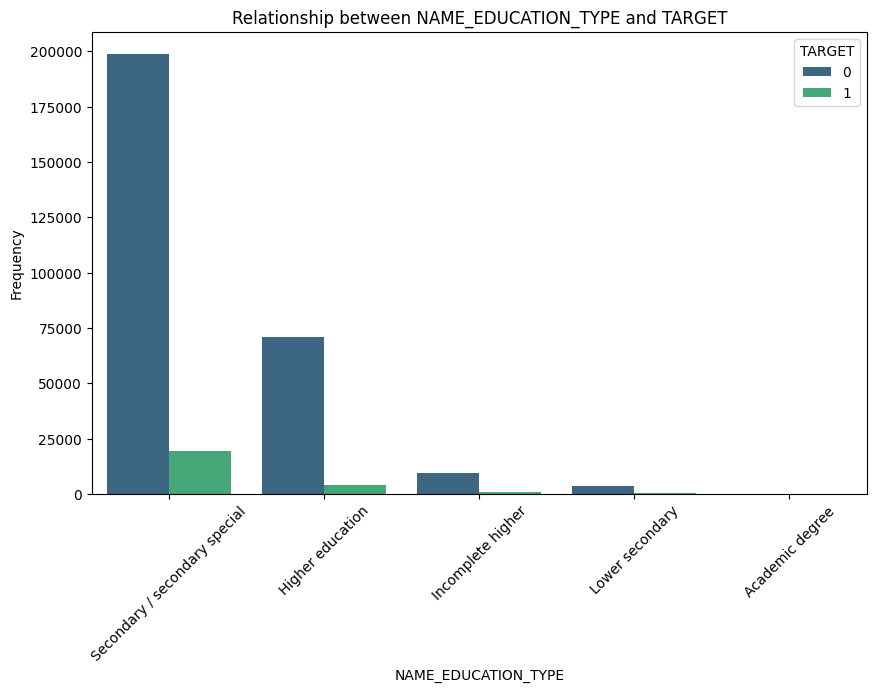

<ipython-input-73-aeceb8c51890>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, hue=None, palette='viridis')


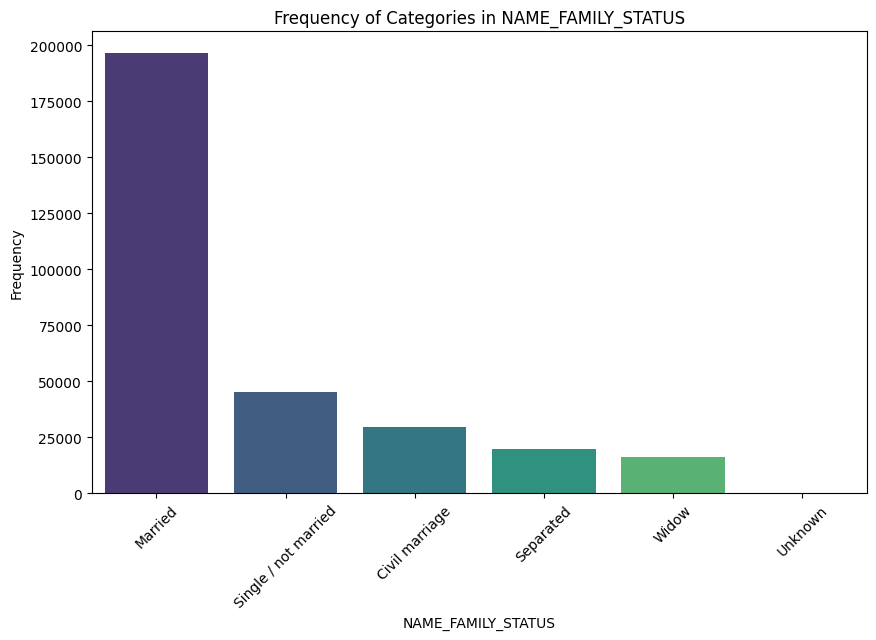

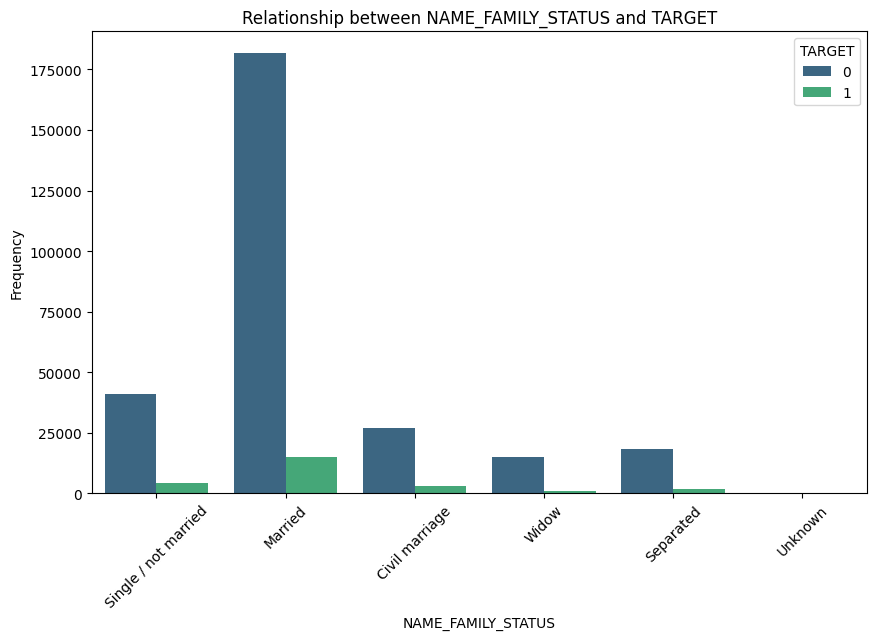

<ipython-input-73-aeceb8c51890>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, hue=None, palette='viridis')


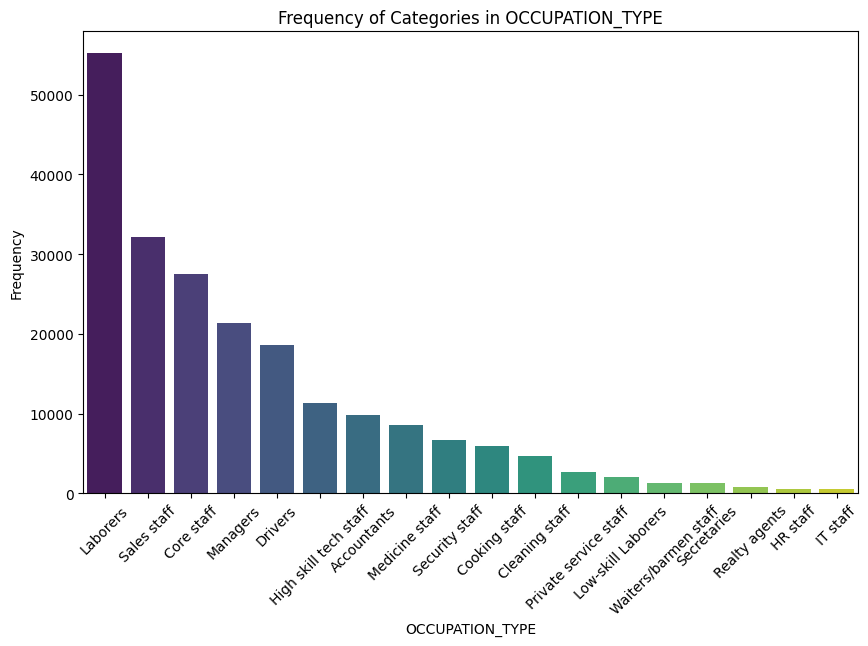

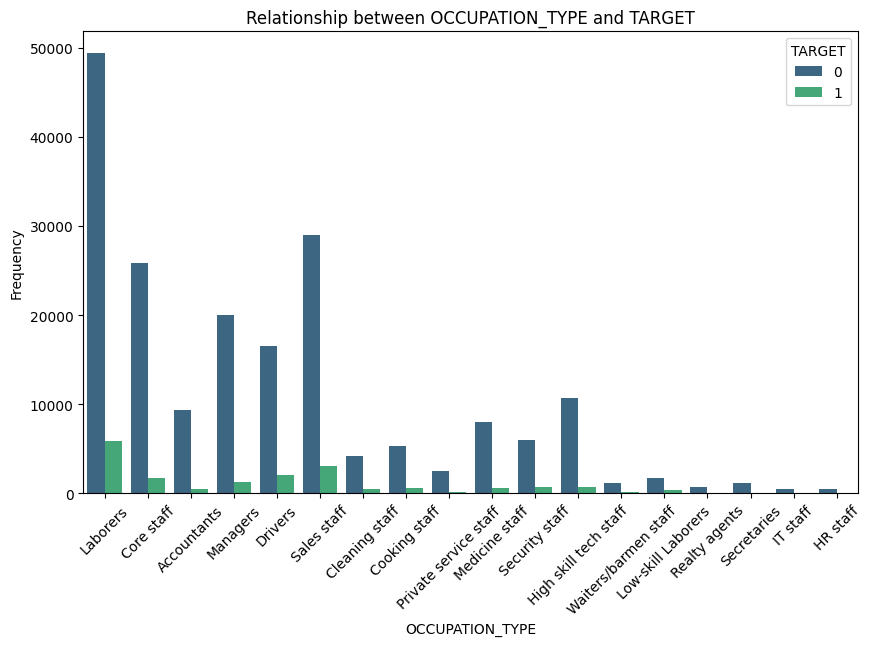

<ipython-input-73-aeceb8c51890>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, hue=None, palette='viridis')


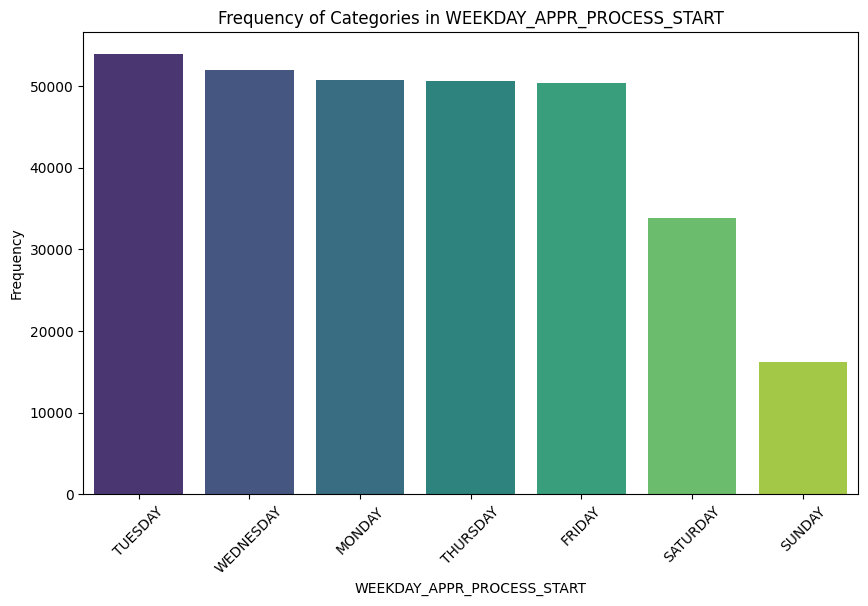

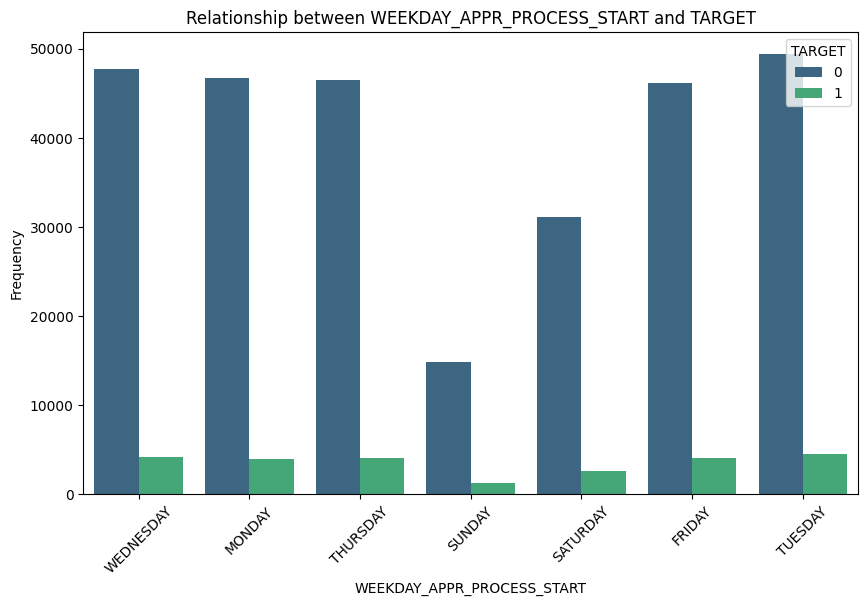

<ipython-input-73-aeceb8c51890>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, hue=None, palette='viridis')


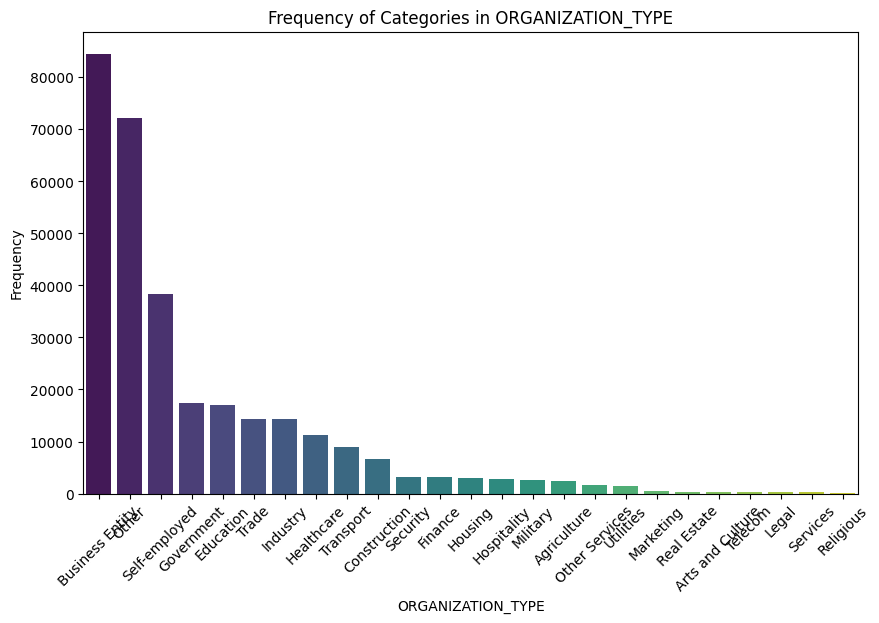

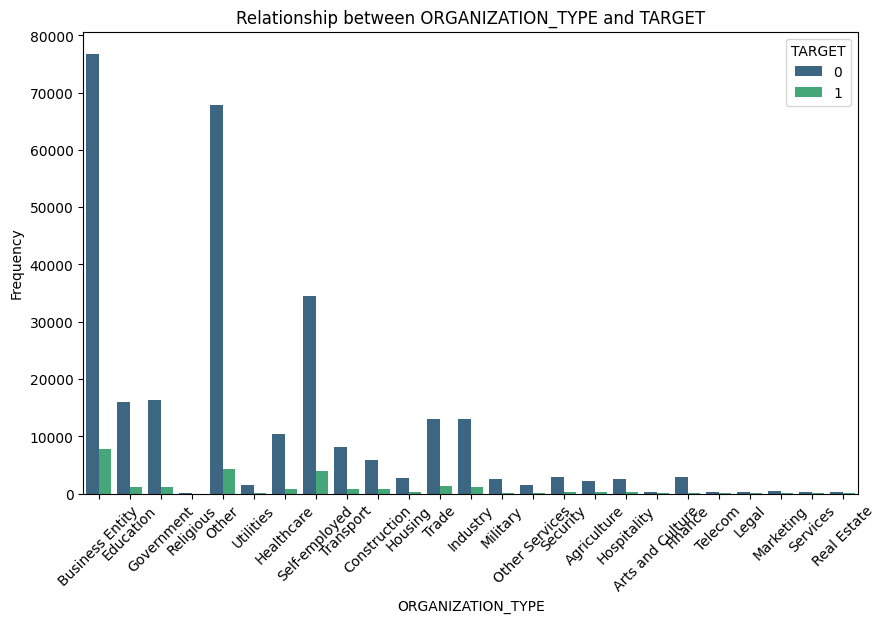

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List kolom yang merupakan variabel kategorikal
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

for col in categorical_cols:
    category_counts = df_application_train[col].value_counts()

    # Plot frekuensi kategori
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, hue=None, palette='viridis')
    plt.title(f'Frequency of Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Cek hubungan dengan variabel target
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_application_train, x=col, hue='TARGET', palette='viridis')
    plt.title(f'Relationship between {col} and TARGET')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.legend(title='TARGET', loc='upper right')
    plt.show()


Eksplorasi Variabel Target

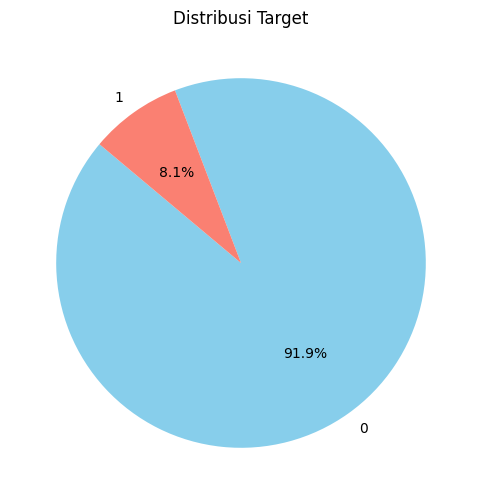

In [74]:
import matplotlib.pyplot as plt

# Menghitung jumlah nilai pada kolom target
target_counts = df_application_train['TARGET'].value_counts()

# Plotting diagram lingkaran
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, colors=['skyblue', 'salmon'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Target')
plt.show()

# Dataset Splitting

In [75]:
from sklearn.model_selection import train_test_split

X = df_application_train.drop(columns=['TARGET'])
y = df_application_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((246002, 53), (61501, 53), (246002,), (61501,))

# Modeling

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

In [78]:
# Tentukan kolom numerik dan kategorikal
numerical_cols = ['CNT_CHILDREN', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                  'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                  'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                  'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                  'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                  'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
                  'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                  'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                  'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                  'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'CREDIT_INCOME_PERCENT', 'TOTAL_REQ_CREDIT', 'AGE',
                  'YEARS_EMPLOYED']

categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

Impute missing value untuk numerik menggunakan median dan kategorik dengan most_frequent. Serta dilakukan Scalling untuk data numerik menggunakan standardScaler dan dilakukan encoding untuk data kategorik menggunakan OneHotencoder

# Model Logistic Regression

In [79]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2'))
])

# Menambahkan parameter yang akan diuji
param_space_lr = {
    "classifier__C": np.logspace(-3, 3, 7),
    "classifier__fit_intercept": [True, False]
}

model_lr = RandomizedSearchCV(logistic_model, param_distributions=param_space_lr, n_iter=10, cv=3, random_state=42)

model_lr.fit(X_train, y_train)

# Tampilkan hasil regresi logistik
print("Best Parameters (Logistic Regression):", model_lr.best_params_)
print("Training Accuracy (Logistic Regression):", model_lr.score(X_train, y_train))
print("Model Best Score (Logistic Regression):", model_lr.best_score_)
print("Test Accuracy (Logistic Regression):", model_lr.score(X_test, y_test))

Best Parameters (Logistic Regression): {'classifier__fit_intercept': False, 'classifier__C': 0.001}
Training Accuracy (Logistic Regression): 0.91925675401013
Model Best Score (Logistic Regression): 0.9192648842870547
Test Accuracy (Logistic Regression): 0.9193509048633356


# Evaluation Model LR

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi label untuk data uji
y_pred = model_lr.predict(X_test)

# Evaluasi performa model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.55      0.01      0.01      4965

    accuracy                           0.92     61501
   macro avg       0.74      0.50      0.48     61501
weighted avg       0.89      0.92      0.88     61501

Confusion Matrix:
[[56514    22]
 [ 4938    27]]


ROC AUC Score: 0.7350437532801778


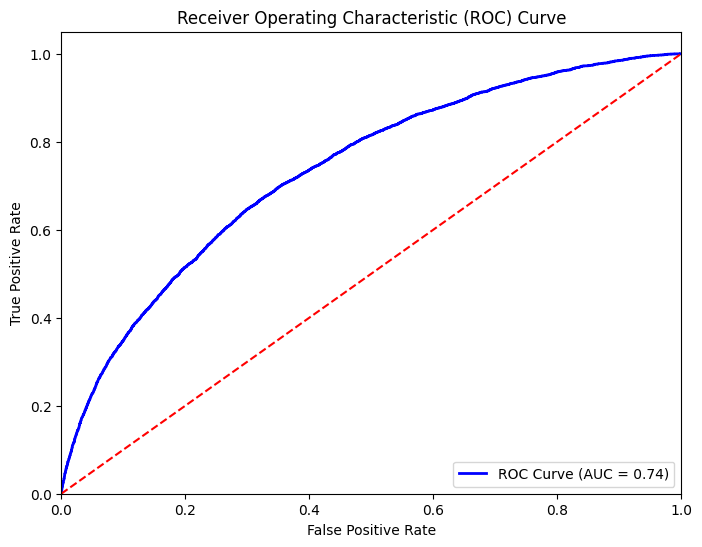

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Menghitung probabilitas prediksi untuk kelas positif
y_pred_proba = model_lr.predict_proba(X_test)[:, 1]

# Menghitung nilai ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Menghitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Model LR

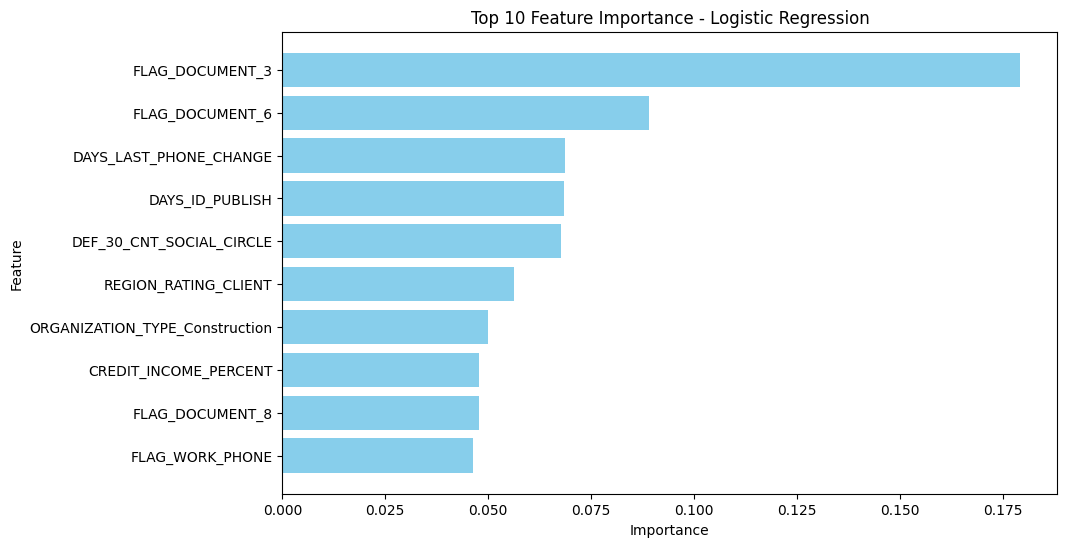

In [96]:
categorical_encoder = model_lr.best_estimator_.named_steps['preprocessor'].transformers_[1][1]
encoded_categories = categorical_encoder.named_steps['onehot'].get_feature_names_out(categorical_cols)
all_cols = numerical_cols + list(encoded_categories)

coefficients = model_lr.best_estimator_.named_steps['classifier'].coef_[0]
feature_importance_lr = pd.DataFrame({'Feature': all_cols, 'Importance': coefficients})
top_10_features_lr = feature_importance_lr.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_features_lr['Feature'], top_10_features_lr['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

# Model XGBOOST

In [82]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Menambahkan parameter yang akan diuji
param_space_xgb = {
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [3, 5, 7],
}

model_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_space_xgb, n_iter=10, cv=3, random_state=42)

model_xgb.fit(X_train, y_train)

# Tampilkan hasil XGBoost
print("Best Parameters (XGBoost):", model_xgb.best_params_)
print("Training Accuracy (XGBoost):", model_xgb.score(X_train, y_train))
print("Model Best Score (XGBoost):", model_xgb.best_score_)
print("Test Accuracy (XGBoost):", model_xgb.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (XGBoost): {'classifier__n_estimators': 100, 'classifier__max_depth': 3}
Training Accuracy (XGBoost): 0.9197160998691067
Model Best Score (XGBoost): 0.9192608188002467
Test Accuracy (XGBoost): 0.9194809840490399


# Evaluation XGBOOST

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi label untuk data uji
y_pred = model_xgb.predict(X_test)

# Evaluasi performa model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.55      0.02      0.03      4965

    accuracy                           0.92     61501
   macro avg       0.73      0.51      0.49     61501
weighted avg       0.89      0.92      0.88     61501

Confusion Matrix:
[[56474    62]
 [ 4890    75]]


ROC AUC Score: 0.7413886433134388


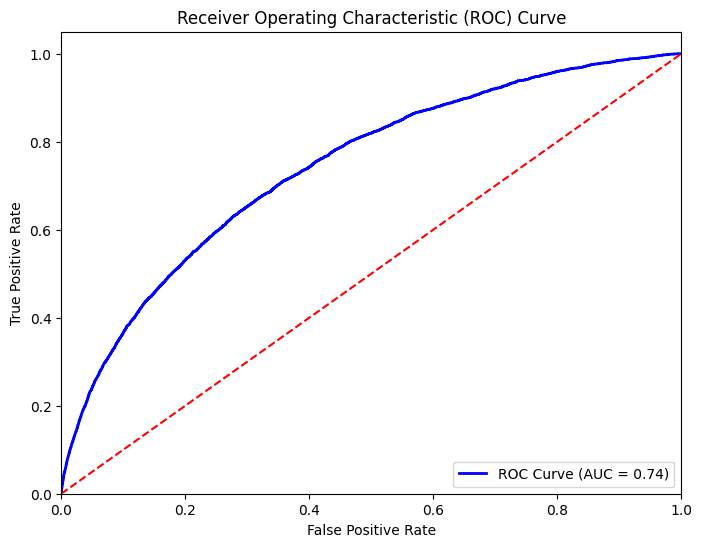

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Menghitung probabilitas prediksi untuk kelas positif
y_pred_proba = model_xgb.predict_proba(X_test)[:, 1]

# Menghitung nilai ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Menghitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Model XGBOOST

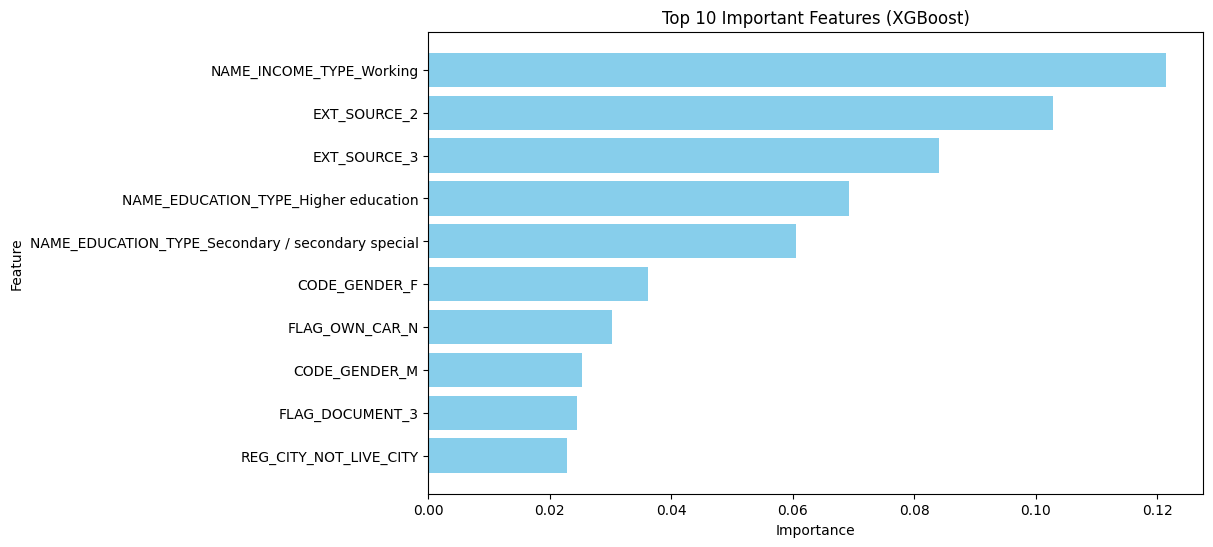

In [89]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

# Preprocessor for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create XGBoost pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, max_depth=3))
])

xgb_model.fit(X_train, y_train)


feature_importance = xgb_model.named_steps['classifier'].feature_importances_
encoded_categorical_cols = xgb_model.named_steps['preprocessor'].transformers_[1][1]\
                                .named_steps['onehot'].get_feature_names_out(input_features=categorical_cols)
feature_names = np.concatenate([numerical_cols, encoded_categorical_cols])

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features (XGBoost)')
plt.gca().invert_yaxis()
plt.show()